# Serializing the train data

This is a code designed to serialize the trainning data, to easy and quicker usage in the trainning part, you should have already have a dabase with the real images of faces with the spoofed generated by the style tranfer

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
import pickle

## Data organization
you should have your directory as:

```
read_vs_spoofed:
|-database_raw
    |-person1
        |-Live
            |-img1
            |-img2
            ...
        |-Spoofed
            |-img1
            ...
    |-person2
        |-...
    |-test
        |-person1
            |-Live
                |-img1
                 ...
            |-Spoofed
                |-....
|-database_serialized
|-models
```

In [2]:
data_dir = ("database_raw")
data_dest = ("database_serialized")
#Set here the size of the squared image, by default it is 300x300. This program will NOT resize the image
img_size = 300
people = os.listdir(data_dir)
people

['001', 'test']

In [3]:
#Load each file insede the path, and stores its indexe. 
def load_files(path,files,count):
    for file in files:
        try:
            img = cv2.imread(os.path.join(path,file))
            training_data.append([img,count])
        except Exeception:
            print(f"Couldn't open file {file}")


In [4]:
# For each person it reads the file, running throguh the Live (0) and Spoofed (1) images, 
#and storing the data with the respective label.
#if a directory with the serilized data is not created it creates a new one. Each person has its own directory 
tags = ["Live","Spoofed"]
for person in people:
    #Ignore the test images
    if person == "test":
        continue
    training_data = []
    person_path = os.path.join(data_dir,person)
    person_path_dest = os.path.join(data_dest,person)
    if not os.path.isdir(person_path_dest):
        os.mkdir(person_path_dest)
    count = 0
    #It loads each type of images separatly, Live from Spoofed
    for tag in tags:
        files = os.listdir(os.path.join(person_path,tag))
        load_files(os.path.join(person_path,tag),files,count)
        count += 1
    #Shuffle the data, to be randomized order
    random.shuffle(training_data)
    #X are the features and y are the labels
    X = []
    y = []
    #Creates the numpy format to use on tensorflow
    for features, label in training_data:
        X.append(features)
        y.append(label)
    X = np.array(X).reshape(-1,img_size,img_size,3)
    print(f"Base of {person} has {len(y)} images")
    #Stores both X and y on the person's directory
    pickle_out = open(os.path.join(person_path_dest,f"X{person}.pickle"),"wb")
    pickle.dump(X,pickle_out)
    pickle_out.close()
    pickle_out = open(os.path.join(person_path_dest,f"y{person}.pickle"),"wb")
    pickle.dump(y,pickle_out)
    pickle_out.close()
        

Base of 001 has 10635 images


In [5]:
person = "001"
pickle_in = pickle_out = open(os.path.join(person_path_dest,f"X{person}.pickle"),"rb")
X = pickle.load(pickle_in)
pickle_in.close()
pickle_in = open(os.path.join(person_path_dest,f"y{person}.pickle"),"rb")
y = pickle.load(pickle_in)
pickle_in.close()

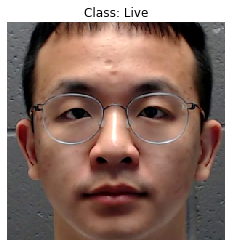

In [6]:
%matplotlib inline
plt.axis("off")
img = 16
plt.title(f"Class: {tags[y[img]]}")
plt.imshow(cv2.cvtColor(X[img], cv2.COLOR_BGR2RGB))